In [150]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


import re

from io import StringIO

import string

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [151]:
import pandas as pd
resumes = pd.read_csv("UpdatedResumeDataSet.csv")

resumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [152]:
print("Number of nulls:", resumes.isnull().values.sum())

Number of nulls: 0


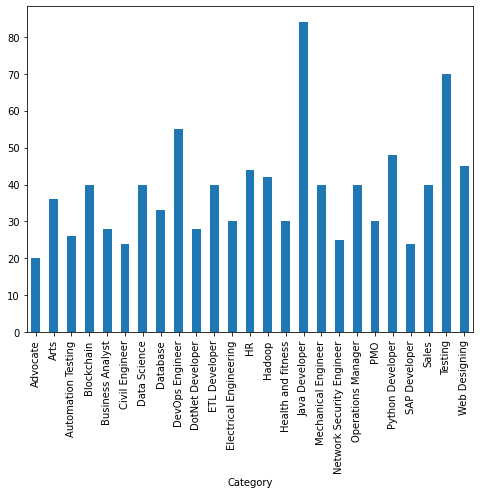

In [153]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
resumes.groupby("Category").Resume.count().plot.bar(ylim=0)
plt.show()

In [154]:
#Deal with the erroneous values in the dataset
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
stop_words = stopwords.words('english')

sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)
    text = re.sub(r"http\S+", "",text)
    html=re.compile(r'<.*?>')
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'')
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    text = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

# resumes[1] = resumes[1].replace('[^a-zA-Z0-9 ]', ' ', regex=True)
# resumes[1] = resumes[1].replace("â¢", '')

resumes['Resume'] = resumes['Resume'].apply(lambda x: clean(x))
resumes.head()

,Category,Resume
0,Data Science,"skill programming language python pandas, nump..."
1,Data Science,education detail may may uit rgpv data scienti...
2,Data Science,"area interest deep learning, control system de..."
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,"education detail mca ymcaust, faridabad, harya..."


In [155]:
# resumes[1]
resumes.to_csv("resume_clean.csv", index=False)

In [156]:
#Association rule mining of resume

In [157]:
skills = [['node.js', 'react.js', 'Javascript'],
           ['Javascript', 'Python', 'Java'],
           ['C++', 'Java', 'Python', 'C'],
           ['react.js', 'node.js', 'Python']]
print(skills)

[['node.js', 'react.js', 'Javascript'], ['Javascript', 'Python', 'Java'], ['C++', 'Java', 'Python', 'C'], ['react.js', 'node.js', 'Python']]


In [158]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
skills_array = te.fit(skills).transform(skills)
skills_array

array([[False, False, False,  True, False,  True,  True],
       [False, False,  True,  True,  True, False, False],
       [ True,  True,  True, False,  True, False, False],
       [False, False, False, False,  True,  True,  True]])

In [159]:
import pandas as pd
skills_df = pd.DataFrame(skills_array, columns = te.columns_)
skills_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   C           4 non-null      bool 
 1   C++         4 non-null      bool 
 2   Java        4 non-null      bool 
 3   Javascript  4 non-null      bool 
 4   Python      4 non-null      bool 
 5   node.js     4 non-null      bool 
 6   react.js    4 non-null      bool 
dtypes: bool(7)
memory usage: 156.0 bytes


In [160]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(skills_df, min_support=0.4, use_colnames=True)
#frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
#frequent_itemsets[frequent_itemsets['length'] == 2].count()
frequent_itemsets

,support,itemsets
0,0.50,(Java)
1,0.50,(Javascript)
2,0.75,(Python)
3,0.50,(node.js)
4,0.50,(react.js)
5,0.50,"(Python, Java)"
6,0.50,"(node.js, react.js)"


In [161]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Java),(Python),0.5,0.75,0.5,1.0,1.333333,0.125,inf
1,(node.js),(react.js),0.5,0.50,0.5,1.0,2.000000,0.250,inf
2,(react.js),(node.js),0.5,0.50,0.5,1.0,2.000000,0.250,inf


In [162]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
newcols = pd.DataFrame(ohe.fit_transform(skills_df).toarray())
newcols.columns = ["Skills" + str(x) for x in newcols.columns]
ohe_col1 = newcols
ohe_col1
newcols

,Skills0,Skills1,Skills2,Skills3,Skills4,Skills5,Skills6,Skills7,Skills8,Skills9,Skills10,Skills11,Skills12,Skills13
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [163]:
df = resumes
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)
df.head()

,Category,Resume,category_id
0,Data Science,"skill programming language python pandas, nump...",0
1,Data Science,education detail may may uit rgpv data scienti...,0
2,Data Science,"area interest deep learning, control system de...",0
3,Data Science,skill r python sap hana tableau sap hana sql s...,0
4,Data Science,"education detail mca ymcaust, faridabad, harya...",0


In [164]:
#tf-idf 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Resume).toarray()
labels = df.category_id
features.shape

(962, 25841)

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(df['Resume'], df['Category'], random_state=0, test_size=0.3)

#extract features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

#*Logistic Regression*

In [166]:
#adopted from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression().fit(X_train_tfidf, y_train)

y_pred_test2 = logreg.predict(vectorizer.transform(X_test))
print(accuracy_score(y_test, y_pred_test2))


print('Accuracy of linear SVC on training set: {:.4f}'.format(logreg.score(X_train_tfidf, y_train)))
print('Accuracy of linear SVC on test set: {:.4f}'.format(logreg.score(vectorizer.transform(X_test), y_test)))

0.9930795847750865
Accuracy of linear SVC on training set: 1.0000
Accuracy of linear SVC on test set: 0.9931


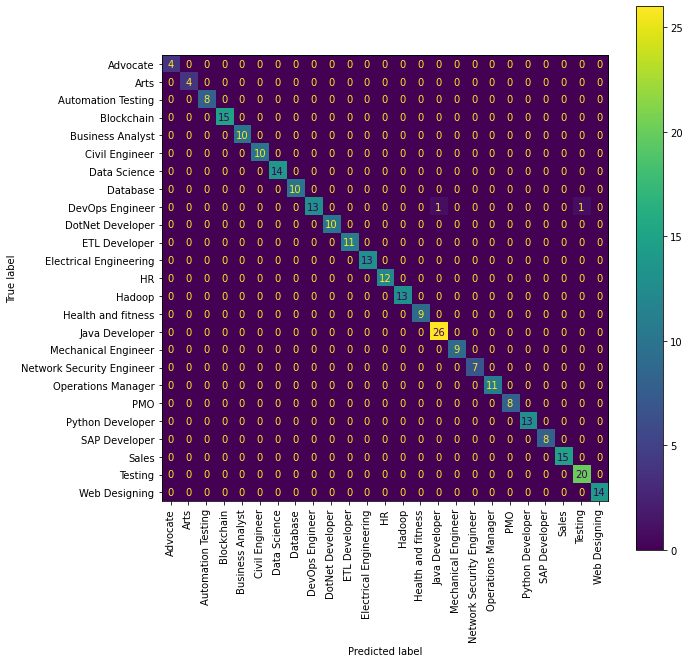

In [167]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, ax = plt.subplots(figsize=(10,10))

cm = confusion_matrix(y_test, y_pred_test2, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)


disp.plot(ax=ax, xticks_rotation = 'vertical')

#Support Vector Machines

In [168]:
#adopted from https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
from sklearn.svm import LinearSVC

lin_svm = LinearSVC()
lin_svm.fit(X_train_tfidf, y_train)

print('Accuracy of linear SVC on training set: {:.4f}'.format(lin_svm.score(X_train_tfidf, y_train)))
print('Accuracy of linear SVC on test set: {:.4f}'.format(lin_svm.score(vectorizer.transform(X_test), y_test)))

Accuracy of linear SVC on training set: 1.0000
Accuracy of linear SVC on test set: 0.9931


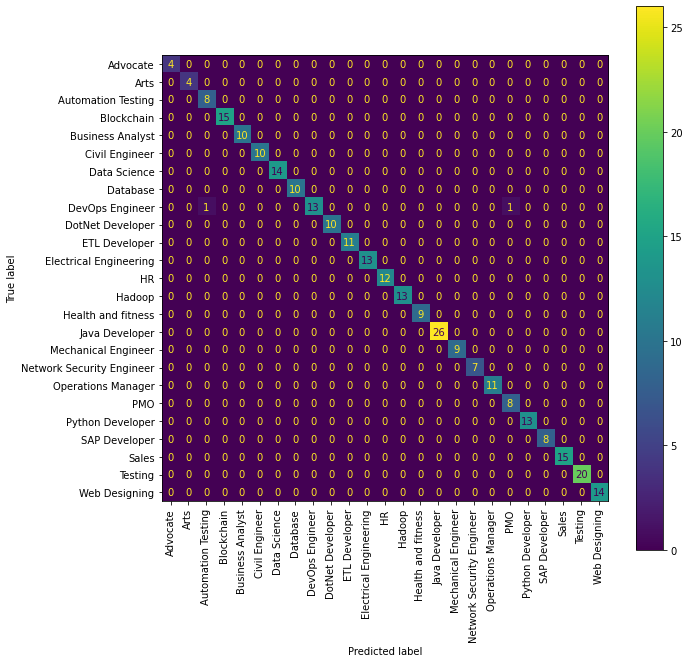

In [169]:
fig, ax = plt.subplots(figsize=(10,10))

predictions = lin_svm.predict(vectorizer.transform(X_test))
cm = confusion_matrix(y_test, predictions, labels=lin_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lin_svm.classes_)


disp.plot(ax=ax, xticks_rotation = 'vertical')
